This Notebook will show:  
1- The relationship between the expression of the genes inside of each model particle, and the distance of these particles to the COM of the clusters defined in 09_Co-occurrenceMatrix.ipynb.

2- The average distance between the Center Of Mass (COM) of the clusters defined in 09_Co-occurrenceMatrix.ipynb, and the average expression of their contained genes

# Libraries and functions

In [1]:
import sys
import cPickle as pickle
import numpy as np

# Parameters to modify 

In [2]:
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/SparseDataModelling/'
# Define the orther of the cells for the ploting
orderCell = ['Ery', 'nCD4', 'Mon']
# Define the coloring options for each cell
colors = [(120/255., 94/255., 240/255.), 
          (254/255., 97/255., 0/255.),
          (220/255., 38/255., 127/255.)
         ]
# Wether to store figures in pdf or not
saveFig = True
# In which of the model clusters we will do the analysis
cluster = 1

# Optinal file with information about expression chip or other measures whose 
# location will be shown in the plots
# Format: Name Chromosome Coordinate Cell1 Cell2, Cell3, ...
# Example: Gene Chr TSS Ery nCD4 Mon  # Each Cell column has the expression value
# Of that cell in the gene that names the row
signalData = basePath + 'additionalInput/expressionData.txt'
# The signal threshold associated to this files (if none leave it as None which
# will define 0 by default)
# Allowed lowest value is 0
threshold = 0

# Run 

## Define new paths 

In [3]:
# Output path for pickles and plots
outdata = basePath + 'outData/modelAnalysis/model_comparisons/coOccurrenceMatrix/'
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/coOccurrenceMatrix/'

## Import additional libraries 

In [4]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
import metrics

## Calculate inter-community distances 

This code will load the model files and region data

In [5]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')

## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

This code will load the clustering data from 02_clusteringModelsEnsemble.ipynb

In [6]:
# If we ran this script with less models, will recover the previous clustering info
clustersPickle= basePath + 'outData/modelAnalysis/clustering/allClusterDict.pickle' 
with open(clustersPickle, "rb") as input_file:
    allClusters = pickle.load(input_file)
print('Recovering previous clustering data from:')
print(clustersPickle)

Recovering previous clustering data from:
/home/julen/TADdyn/SparseDataModelling/outData/modelAnalysis/clustering/allClusterDict.pickle


This code will load expression data and gene positions 

In [7]:
newSignalPos, newSignal = fileHandling.getSignalAndPos(regiones, orderCell, 
                                                       signalData, signalThreshold=threshold)

This code will load the needed data regarding the communities

In [8]:
with open(outdata + 'coOccurrenceClusters', 'rb') as handle:
    clustersBinPos, clusterGeneNames = pickle.load(handle)

This code will calculate the ensemble mean distance between the center of mass of each community

In [9]:
meandistancesCluster, centersOfMass = metrics.clusterCOMdistances(regiones,models, allClusters, clustersBinPos,
                        cluster, modelsKeep)

This code will store the calculated distances

In [10]:
# store it 
with open(outdata + 'clustersDistance.pickle', 'wb') as handle:
    pickle.dump([meandistancesCluster, centersOfMass], handle, protocol=pickle.HIGHEST_PROTOCOL)

This code will calculate and rank the mean expression in each community 

In [11]:
rankedSum = metrics.rankExpression(clustersBinPos, newSignalPos, newSignal)

This code will plot the COM of clusters and average expression ranking

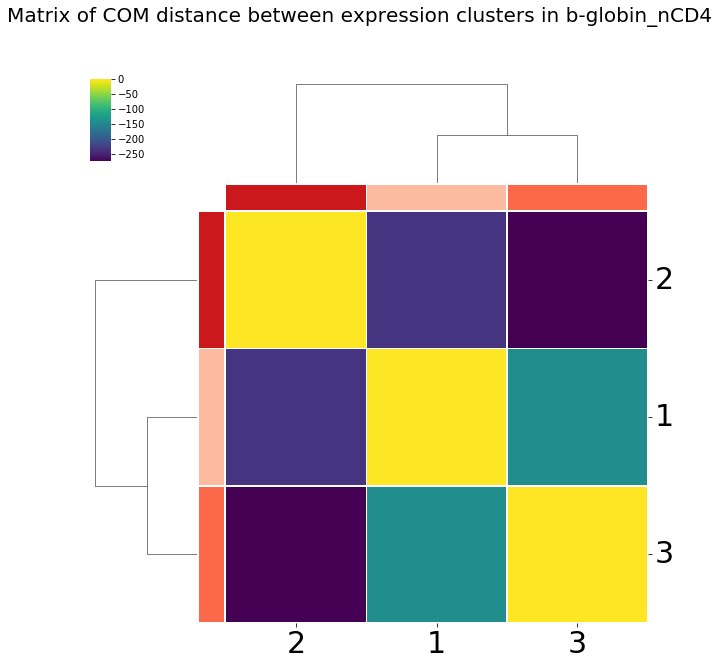

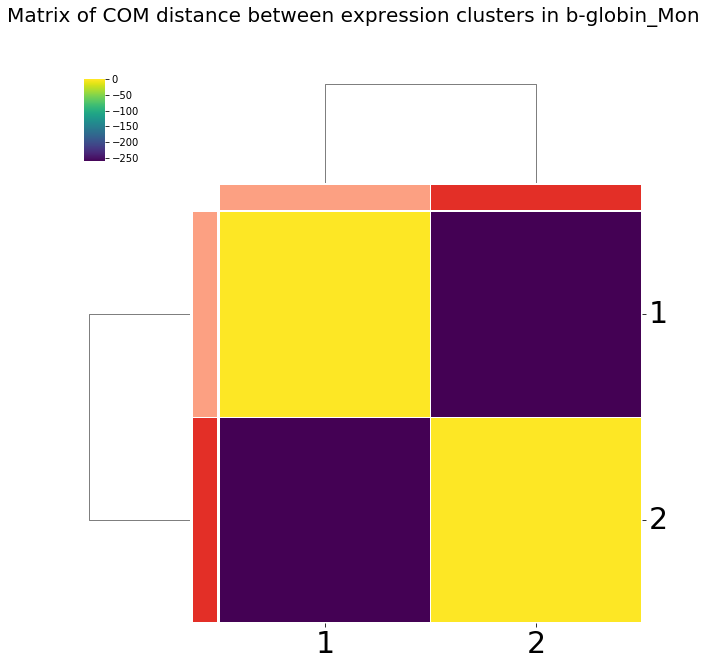

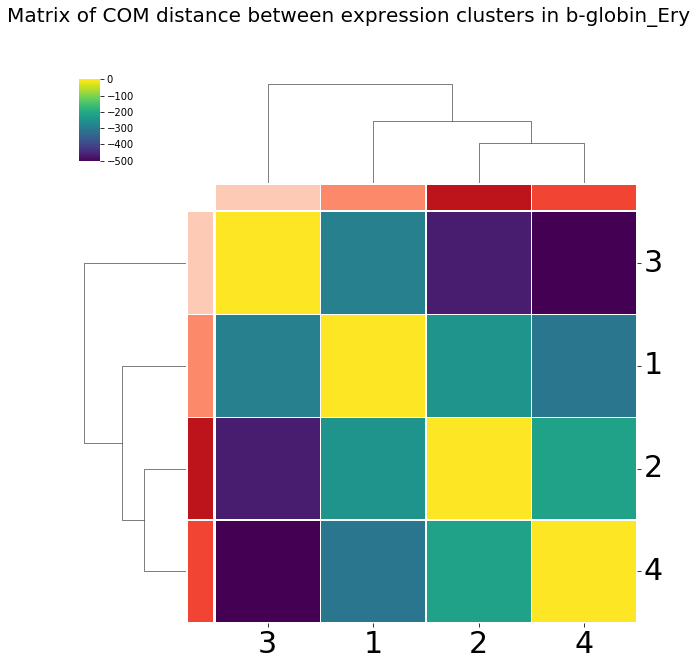

In [12]:
plotting.plotCOM(meandistancesCluster, clustersBinPos, outplot, rankedSum, 
                 cluster, saveFig)


This code shows the mean distances between each community

In [13]:
for cell in meandistancesCluster[regi]:
    for compi in  meandistancesCluster[regi][cell]:
        print cell, compi, np.mean(meandistancesCluster[regi][cell][compi])

nCD4 (1, 2) 233.1616907686515
nCD4 (1, 3) 140.73887310454722
nCD4 (2, 3) 275.1259608070385
Mon (1, 2) 261.5564184134739
Ery (1, 2) 243.4701036415768
Ery (1, 3) 285.6366241522787
Ery (1, 4) 305.96101485173676
Ery (2, 3) 465.22765007698814
Ery (3, 4) 504.2879856667071
Ery (2, 4) 214.66971966502882


## Calculate the expression paterns in relation to the COM of each community

This code will calculate the expression of each gene in relation to the distance to the COM of its community

In [14]:
expeCOMdist = metrics.getExpressionAndCOMd(centersOfMass, models, modelsKeep, clustersBinPos,
                                           newSignalPos, newSignal, allClusters, cluster)

This code will plot the measured distance and expression values

### Ery ###


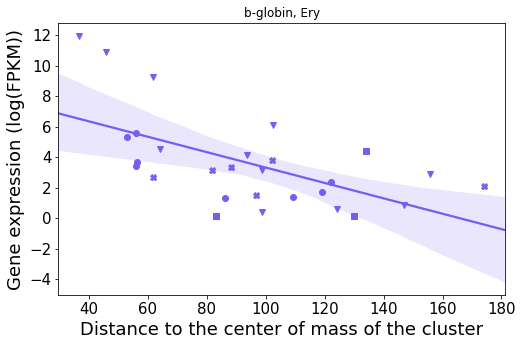

### nCD4 ###


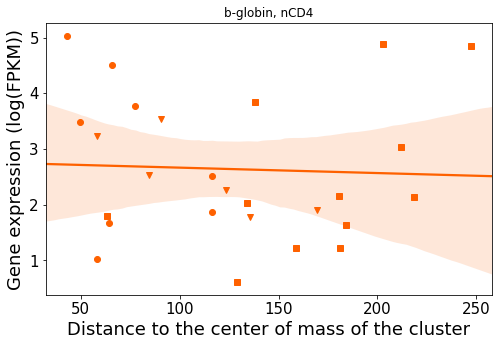

### Mon ###


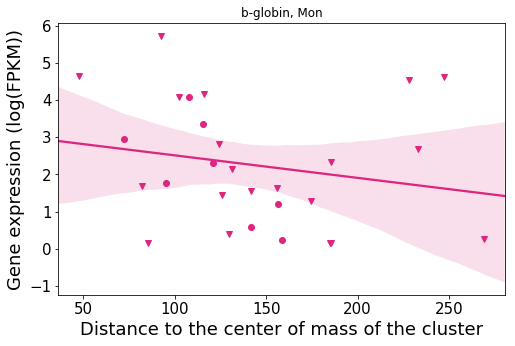

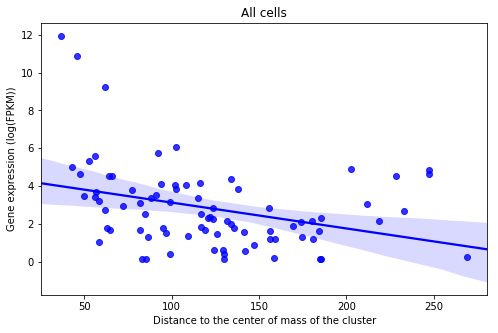

In [15]:
statistics = plotting.plotExpressionAndCOMd(outplot, expeCOMdist, orderCell, colors,
                          saveFig=saveFig)

This code will print the statistics regarding the relationship between expression and distance to the COM of the community

In [16]:
for regi in statistics:
    print ('#' * 3 + ' %s ' %regi + '#' * 3)
    for cell in statistics[regi]:
        print ('-' * 3 + ' %s ' %regi + '-' * 3)
        print statistics[regi][cell]['lineregress']
        print statistics[regi][cell]['spearmanr']

### b-globin ###
--- b-globin ---
LinregressResult(slope=-0.006047563965558605, intercept=3.118008512818875, rvalue=-0.2018076879429855, pvalue=0.303092679022022, stderr=0.005756086993958272)
SpearmanrResult(correlation=-0.3037766830870279, pvalue=0.11605529821938766)
--- b-globin ---
LinregressResult(slope=-0.013662028528529565, intercept=4.495243324790494, rvalue=-0.3400430464585472, pvalue=0.0017741167900438587, stderr=0.004224287570098608)
SpearmanrResult(correlation=-0.37160022202631665, pvalue=0.0005875849764095406)
--- b-globin ---
LinregressResult(slope=-0.05045179767602947, intercept=8.360839980719948, rvalue=-0.5932921010954759, pvalue=0.0008757905364136424, stderr=0.013424879934121274)
SpearmanrResult(correlation=-0.5555555555555555, pvalue=0.0021469538258602067)
--- b-globin ---
LinregressResult(slope=-0.0009723473936158093, intercept=2.762495406768582, rvalue=-0.045507707427234326, pvalue=0.8252898228918412, stderr=0.004356931264994931)
SpearmanrResult(correlation=-0.09059